## **Give the Emotion number According to Text**

In [1]:
import pandas as pd
from transformers import pipeline
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('finalds.csv')

# Check if GPU is available and set device accordingly
device = 0 if torch.cuda.is_available() else -1

# Initialize the emotion classification pipeline with GPU support
classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base', device=device)

# Define the mapping from labels to emotions including synonyms
emotion_to_label = {
    "sadness": 0,
    "grief": 0,
    "sorrow": 0,
    "joy": 1,
    "happiness": 1,
    "delight": 1,
    "disgust": 2,  # Replacing "love" with "disgust"
    "revulsion": 2,
    "abhorrence": 2,
    "anger": 3,
    "rage": 3,
    "fury": 3,
    "fear": 4,
    "terror": 4,
    "fright": 4,
    "surprise": 5,
    "amazement": 5,
    "astonishment": 5,
    "neutral": 6,
    "indifference": 6,
    "apathy": 6
}

# Function to predict and map emotions including synonyms
def detect_emotions(texts):
    predictions = classifier(texts)
    labels = [emotion_to_label[pred['label']] if pred['label'] in emotion_to_label else 6 for pred in predictions]
    return labels

# Process the dataset in batches
batch_size = 16
num_batches = (len(df) + batch_size - 1) // batch_size
emotion_labels = []

for i in tqdm(range(num_batches)):
    batch_texts = df['Text'][i * batch_size:(i + 1) * batch_size].tolist()
    batch_labels = detect_emotions(batch_texts)
    emotion_labels.extend(batch_labels)

# Ensure the length of emotion_labels matches the length of the dataframe
if len(emotion_labels) != len(df):
    raise ValueError("The number of emotion labels does not match the number of texts")

df['corrected_label'] = emotion_labels

# Save the dataset with the new labels
df.to_csv('Updated.csv', index=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

100%|██████████| 631/631 [10:06<00:00,  1.04it/s]


## **Add Emotion Column contain actual Emotions**

In [3]:

# Load the dataset
file_path = 'Updated.csv'
df = pd.read_csv(file_path)

# Define the emotion mapping
emotion_mapping = {
    0: "sadness",
    1: "joy",
    2: "disgust",
    3: "anger",
    4: "fear",
    5: "surprise",
    6: "neutral"
}

# Add the extra column called 'Emotion'
df['Emotion'] = df['corrected_label'].map(emotion_mapping)

# Display the first few rows of the dataframe to verify the changes
print(df.head())

                      Text  Label  corrected_label  Emotion
0               Excuse me.      6                3    anger
1  Do you have your forms?      5                6  neutral
2                    Yeah.      6                6  neutral
3         Let me see them.      6                6  neutral
4      Is there a problem?      5                6  neutral


## **Percentage of Each Emotion in Texts**

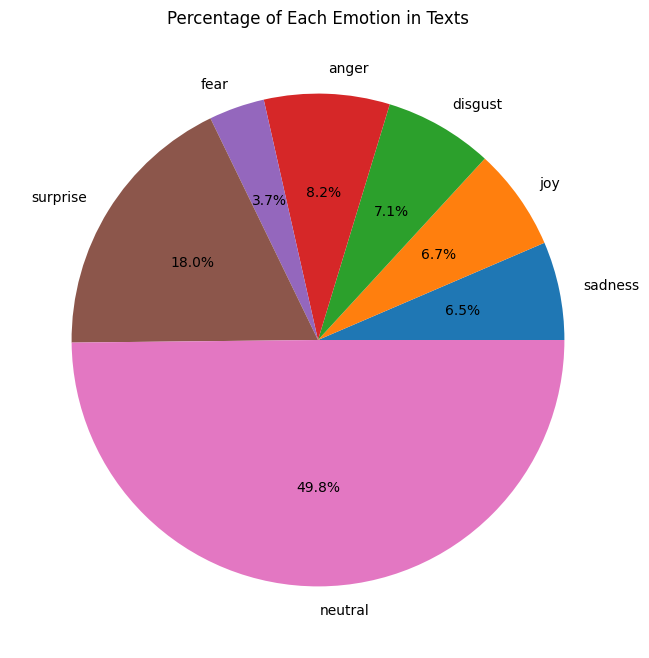

In [4]:
import matplotlib.pyplot as plt

# Load the dataset with labels
df = pd.read_csv('Updated.csv')

# Define the mapping from labels to emotions
label_to_emotion = {
    0: "sadness",
    1: "joy",
    2: "disgust",
    3: "anger",
    4: "fear",
    5: "surprise",
    6: "neutral"
}

# Count the number of occurrences of each emotion
emotion_counts = df['corrected_label'].value_counts().sort_index()

# Map the numeric labels back to their string representations for better readability in the plots
emotion_counts.index = emotion_counts.index.map(label_to_emotion)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
emotion_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Each Emotion in Texts')
plt.ylabel('')
plt.show()
